In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [31]:
# Use a pipeline as a high-level helper
from transformers import pipeline

# pipe_summary = pipeline("summarization", model="Falconsai/text_summarization")
pipe_summary = pipeline("summarization", model="Falconsai/text_summarization", device = 'cuda')

config.json:   0%|          | 0.00/1.49k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

In [65]:
from datasets import load_dataset

dataset = load_dataset("databricks/databricks-dolly-15k")

Generating train split:   0%|          | 0/15011 [00:00<?, ? examples/s]

In [66]:
# filtered_rows['response'][2]

In [78]:
first_100_rows = dataset['train'].select(range(8000))

# Фильтрация строк, где 'category' == 'summarisation'
filtered_rows = first_100_rows.filter(lambda x: x['category'] == 'summarization')
filtered_contexts = filtered_rows.map(remove_columns=['instruction', 'response', 'category'])
texts = filtered_contexts.rename_column('context', 'text')

# Вывод результатов
texts

Dataset({
    features: ['text'],
    num_rows: 628
})

In [11]:
summary = pipe_summary(texts['text'])

Your max_length is set to 200, but your input_length is only 151. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=75)
Token indices sequence length is longer than the specified maximum sequence length for this model (716 > 512). Running this sequence through the model will result in indexing errors
Your max_length is set to 200, but your input_length is only 83. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=41)
Your max_length is set to 200, but your input_length is only 156. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=78)
Your max_length is set to 200, but your input_length is only 117. Sin

In [12]:
summary = [x['summary_text'] for x in summary]

In [13]:
# summary

In [5]:
# text = ["""Transferring the knowledge from a large to a small model 
# needs to somehow teach to the latter without loss of validity. If both
# models are trained on the same data, the small model may have insufficient 
# capacity to learn a concise knowledge representation given the same computational 
# resources and same data as the large model. However, some information about a concise
# knowledge representation is encoded in the pseudolikelihoods assigned to its output: when 
# a model correctly predicts a class, it assigns a large value to the output variable 
# corresponding to such class, and smaller values to the other output variables. 
# The distribution of values among the outputs for a record provides 
# information on how the large model represents knowledge. 
# Therefore, the goal of economical deployment of a valid model
# can be achieved by training only the large model on the data, exploiting
# its better ability to learn concise knowledge representations, and then distilling 
# such knowledge into the smaller model, that would not be able to learn it on its own, 
# by training it to learn the soft output of the large model""",
        
# """Both shallow and deep learning (e.g., recurrent nets) of ANNs for
# speech recognition have been explored for many years.[81][82][83] 
# These methods never outperformed non-uniform internal-handcrafting 
# Gaussian mixture model/Hidden Markov model (GMM-HMM) technology based
# on generative models of speech trained discriminatively.[84] Key 
# difficulties have been analyzed, including gradient diminishing
# and weak temporal correlation structure in neural predictive models.
# Additional difficulties were the lack of training data and limited 
# computing power. Most speech recognition researchers moved away from
# neural nets to pursue generative modeling. An exception was at SRI 
# International in the late 1990s. Funded by the US government's NSA 
# and DARPA, SRI studied deep neural networks (DNNs) in speech and 
# speaker recognition. The speaker recognition team led by Larry Heck
# reported significant success with deep neural networks in speech 
# processing in the 1998 National Institute of Standards and Technology
# Speaker Recognition evaluation.[87] The SRI deep neural network was 
# then deployed in the Nuance Verifier, representing the first major 
# industrial application of deep learning.[88] The principle of elevating
# "raw" features over hand-crafted optimization was first explored 
# successfully in the architecture of deep autoencoder on the "raw"
# spectrogram or linear filter-bank features in the late 1990s,[88]
# showing its superiority over the Mel-Cepstral features that contain
# stages of fixed transformation from spectrograms. 
# The raw features of speech, waveforms, later produced excellent larger-scale results"""
#        ]

# summary = pipe_summary(text)

In [60]:
import transformers
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer_bert = AutoTokenizer.from_pretrained("cross-encoder/ms-marco-TinyBERT-L-2-v2")
model_bert = AutoModelForSequenceClassification.from_pretrained("cross-encoder/ms-marco-TinyBERT-L-2-v2")

tokenizer_config.json:   0%|          | 0.00/525 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/787 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/17.6M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [61]:
bert = model_bert.bert
bert

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 128, padding_idx=0)
    (position_embeddings): Embedding(512, 128)
    (token_type_embeddings): Embedding(2, 128)
    (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-1): 2 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=128, out_features=128, bias=True)
            (key): Linear(in_features=128, out_features=128, bias=True)
            (value): Linear(in_features=128, out_features=128, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=128, out_features=128, bias=True)
            (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)


In [16]:
inputs = tokenizer_bert(summary, return_tensors='pt', padding = True)

In [17]:
outputs = bert(**inputs)
texts_vectors = outputs['pooler_output']

In [18]:
texts_vectors.size()

torch.Size([628, 128])

## Clusterisation


In [3]:
import sklearn
import optuna
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn import metrics

In [4]:
# X = texts_vectors.detach().numpy()
# kmeans = KMeans(n_clusters=3, ).fit(X)
# np.open('texts_vectors.npy', X)
X = np.load('/kaggle/input/bert-vectorized-t5-summaries/texts_vectors.npy')

In [5]:
X.shape

(628, 128)

In [112]:
def objective_kmeans(trial):
    
    params = dict(
        n_clusters = trial.suggest_int('n_clusters', 3, 20),
    )
    
    model = KMeans(**params)
    model.fit(X)
    labels = model.labels_
#     score = metrics.calinski_harabasz_score(X, labels)
    score = metrics.silhouette_score(X, labels, metric='euclidean')
    
    return score


def objective_DBSCAN(trial):
    
    params = dict(
#         min_samples = trial.suggest_int('min_samples', 3, 20),
#         leaf_size =  trial.suggest_int('leaf_size', 10, 120),
#         algorithm = trial.suggest_categorical('algorithm', 
#                                               ['auto', 'brute', 'kd_tree', 'ball_tree']),
        eps = trial.suggest_float('eps', 1, 4, step=0.01),
        p = trial.suggest_int('p', 2, 60)
    )
    
    model = DBSCAN(**params)
    model.fit(X)
    labels = model.labels_
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters < 2:
        return 0.00000000001  # Не учитывать эти параметры, если кластеров меньше 2
#     score = metrics.calinski_harabasz_score(X, labels)
    score = metrics.silhouette_score(X, labels, metric='euclidean')
    
    return score
def objective_spec(trial):
    
    params = dict(
        n_components = trial.suggest_int('n_components', 3, 30),
        gamma = trial.suggest_float('gamma', 0.4, 4, step=0.2),
        n_neighbors = trial.suggest_int('n_neighbors', 5, 30),
        degree = trial.suggest_int('degree', 3, 6),
        n_clusters = trial.suggest_int('n_clusters', 2, 30)
    )
    
    model = SpectralClustering(**params)
    model.fit(X)
    labels = model.labels_
    
#     n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
#     if n_clusters < 2:
#         return 0.00000000001  # Не учитывать эти параметры, если кластеров меньше 2
#     score = metrics.calinski_harabasz_score(X, labels)
    score = metrics.silhouette_score(X, labels, metric='euclidean')
    
    return score


In [114]:
study = optuna.create_study(
    study_name='1', 
    direction='maximize', 
    sampler=optuna.samplers.TPESampler()
)

study.optimize(objective_spec, n_trials=40)

[I 2024-06-06 16:01:34,487] A new study created in memory with name: 1
[I 2024-06-06 16:01:34,746] Trial 0 finished with value: 0.046432022005319595 and parameters: {'n_components': 12, 'gamma': 1.2000000000000002, 'n_neighbors': 26, 'degree': 5, 'n_clusters': 20}. Best is trial 0 with value: 0.046432022005319595.
[I 2024-06-06 16:01:35,837] Trial 1 finished with value: 0.10543689876794815 and parameters: {'n_components': 24, 'gamma': 4.0, 'n_neighbors': 8, 'degree': 4, 'n_clusters': 17}. Best is trial 1 with value: 0.10543689876794815.
[I 2024-06-06 16:01:36,876] Trial 2 finished with value: 0.15738509595394135 and parameters: {'n_components': 21, 'gamma': 2.4, 'n_neighbors': 29, 'degree': 3, 'n_clusters': 12}. Best is trial 2 with value: 0.15738509595394135.
[I 2024-06-06 16:01:37,882] Trial 3 finished with value: -0.009626167826354504 and parameters: {'n_components': 26, 'gamma': 2.2, 'n_neighbors': 24, 'degree': 5, 'n_clusters': 30}. Best is trial 2 with value: 0.15738509595394135.

In [115]:
best = study.best_trial
best_model = SpectralClustering(**best.params)
best_model.fit(X)
labels = best_model.labels_

print(best.params)
print(set(best_model.labels_))
# best_model.core_sample_indices_
# cluster_centers = best_model.cluster_centers_
labels.shape

{'n_components': 18, 'gamma': 0.4, 'n_neighbors': 30, 'degree': 3, 'n_clusters': 2}
{0, 1}


(628,)

In [116]:
X.shape

(628, 128)

In [117]:
def compute_cluster_centers(X, labels):
#     x = np.array(X)
    n = len(set(labels))
    cluster_centers = np.zeros((n, X.shape[1]))
    cluster_n = np.zeros((n,1))
    for el in labels:
        cluster_n[el] += 1
#     map(lambda x: x,X)
    for i, el in enumerate(X):
        cluster_centers[labels[i]] += el
    cluster_centers /= cluster_n
#     cluster_centers = np.mean(X, axis = 0, )
    return cluster_centers   

In [118]:
cluster_centers = compute_cluster_centers(X, labels)
cluster_centers.shape

(2, 128)

(array([627.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

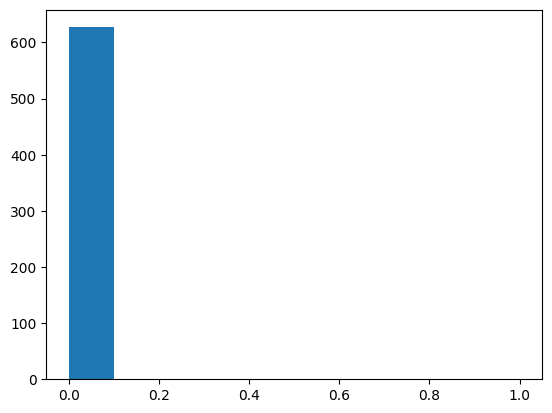

In [120]:
plt.hist(labels)

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import umap

umap_model = umap.UMAP(n_components=2, random_state = 42)

X_embedded = umap_model.fit_transform(X)
X_new_embedded = umap_model.transform(cluster_centers)

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


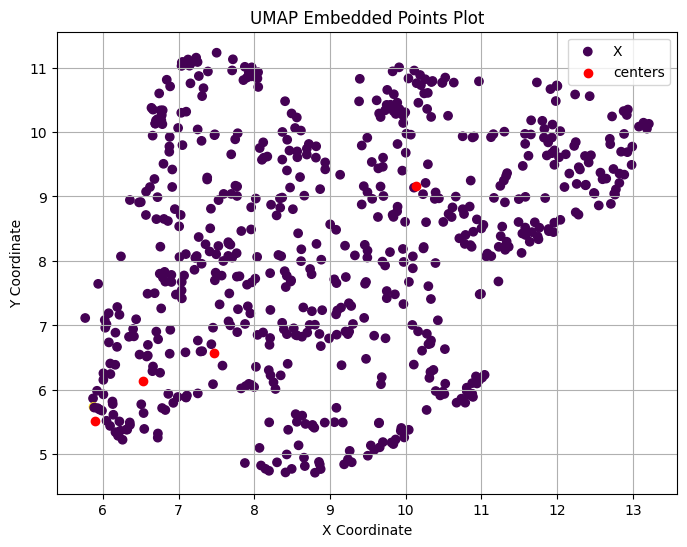

In [119]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='viridis', label='X')
plt.scatter(X_new_embedded[:, 0], X_new_embedded[:, 1], c='red', label='centers')
plt.title('UMAP Embedded Points Plot')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)

# Показываем график
plt.show()

In [57]:
# cluster_centers

### AI generated list of 100 the most probable names  
I'ts better to train decoder after bert, or instead of bert take decoder from t5. However, it's the first trial and it should simple, fast-implemented and with acceptable quality

In [93]:
import numpy as np

titles = [
    "Love and Relationships",
    "Friendship",
    "Family Dynamics",
    "Personal Growth",
    "Education",
    "Health and Wellness",
    "Technology",
    "Environment",
    "Politics",
    "Economics",
    "Crime and Justice",
    "War and Peace",
    "Science and Innovation",
    "Culture and Society",
    "Travel and Adventure",
    "Art and Literature",
    "Religion and Spirituality",
    "Sports and Recreation",
    "History and Heritage",
    "Food and Cooking",
    "Fashion and Style",
    "Mental Health",
    "Business and Entrepreneurship",
    "Music and Entertainment",
    "Social Issues",
    "Human Rights",
    "Disaster and Emergency",
    "Immigration and Diversity",
    "Aging and Mortality",
    "Environmental Conservation",
    'Sport'
]


In [94]:
from sklearn.metrics.pairwise import cosine_similarity

inputs_email = tokenizer_bert(titles, return_tensors='pt', padding = True)
outputs_email = bert(**inputs_email)
cluster_names_vec = outputs_email['pooler_output'].detach().numpy()


cluster_idx = np.argmax(cosine_similarity(cluster_names_vec, cluster_centers), axis = 0)
cluster_names = []
for idx in cluster_idx:
    cluster_names.append(titles[idx])
cluster_names

['Disaster and Emergency',
 'Immigration and Diversity',
 'Health and Wellness',
 'Music and Entertainment']

In [97]:
import random 
beg=10 
end=100 
rnd = random.randint(beg, end) 

label = best_model.labels_[rnd]
print('TEXT:\n', texts[rnd]['text'], '\n\nLABEL:', label, '\n\nCLUSTER NAME:', cluster_names[label])

TEXT:
 Aries (♈︎) (Greek: Κριός, romanized: Kriós, Latin for "ram") is the first astrological sign in the zodiac, spanning the first 30 degrees of celestial longitude (0°≤ λ <30°), and originates from the Aries constellation. Under the tropical zodiac, the Sun transits this sign from approximately March 21 to April 19 each year. This time duration is exactly the first month of the Solar Hijri calendar (Arabic Hamal/Persian Farvardin/Pashto Wray). 

LABEL: 0 

CLUSTER NAME: Disaster and Emergency
